# Which Pittsburgh Neighborhood is the Healthiest?

Big Ideas Final Project by Shreya Agrawal, Paul Desaro, and Lauren Jablunovsky

The Covid-19 Pandemic has shown us that our health is not something we should take for granted. Our health is integrated into everything that we do, so it makes sense to prioritize health and wellness in our daily lives. When tasked with determining the best neighborhood in Pittsburgh, our team came to the conclusion that the *best* neighborhood will ultimately be the **healthiest** neighborhood.

### What determines a healthy neighborhood?

There are so many factors to consider when thinking about what makes a neigborhood healthy. While environmental factors continue to have an increased role in determining the quality of necessities like air and water, our group leaned into other, non-environmental metrics for quantifying the health of Pittsburgh neighborhoods. The three metrics we decided to consider are **nutrition, access to medical care, and opportunity for recreation and fitness.** Orinigally, we considered focusing on just one of any of these three metrics and looked for datasets that fit under just one idea, but then realized our analysis would be far more compelling if we combined analysis under all *three* ideas into the overall metric of health.

### The Datasets

All of our datasets come from the WPRDC website. For the nutrition metric, Lauren analysed the dataset containing information about the Allegheny County Farmers Market Nutrition Program, specifically the CSV file containing the current/most recent markets.  https://data.wprdc.org/dataset/allegheny-county-farmers-markets-locations.

Shreya analyzed the dataset containing information about the Steps in different neighborhoods in the city of Pittsburgh as well as the dataset containing information about the Parks in different neighborhoods in the city of Pittsburgh.  
The datasets used are below 
https://data.wprdc.org/dataset/parks 
https://data.wprdc.org/dataset/city-steps

## OTHER TEAM MEMBERS DATASETS AND DESCRIPTION HERE

# Individual Data Analysis

First up, let's take a look at the nutrition of Pittsburgh neighborhoods. Farmer's markets are an excellent way for a community to get access to locally grown, healthy foods, so seeing which neighborhood has the most farmer's markets will help us determine the healthiest neighborhood overall.

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, let's import our raw Farmer's Market data to see what we're working with.

In [2]:
farm_market = pd.read_csv("Farmers-market.csv")
farm_market.head()

,market_id,market_type,market_name,address1,city,state,zip_code,latitude,longitude,phone,phone_ext,county
0,21,Farm Stand,Beccari's Farm Market,5095 Thomas Run Road,Oakdale,PA,15071,40.375388,-80.135377,4.122219e+09,NaN,Allegheny
1,51,Farm Market,Carrick Citiparks Farmers Market,1529 Brownsville Road,Pittsburgh,PA,15210,40.391341,-79.986603,4.124227e+09,NaN,Allegheny
2,90,Farm Market,East Liberty Farmers Market,N Euclid Ave & Broad St,Pittsburgh,PA,15026,40.470769,-79.922862,NaN,NaN,Allegheny
3,92,Farm Stand,Eichner's Farm Market & Greenhouses,285 Richard Road,Wexford,PA,15090,40.608589,-80.061099,7.249352e+09,NaN,Allegheny
4,207,Farm Market,Monroeville FM,2399 Tillbrook Rd,Monroeville,PA,15146,40.418362,-79.763612,7.245389e+09,NaN,Allegheny


Cool! Just from the head of our data, I can see some of these markets aren't in Pittsburgh neighborhoods though. Maybe plotting the points on our Pittsburgh neighborhoods shapefile will help us see how many points we'll need to eliminate.

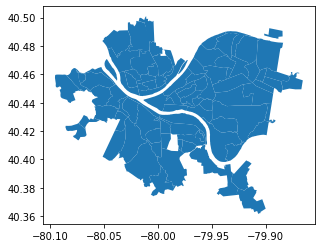

In [3]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Here's the shapefile for our Pittsburgh neighborhoods. Before we plot the farmer's markets, I'm going to make the file a black and white outline so it's easier to read our data on.

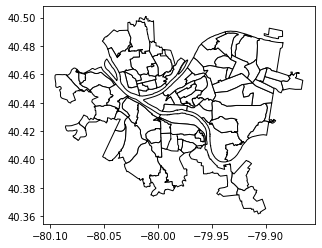

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')
neighborhoods.plot(ax=ax, color="white", edgecolor='black')
plt.show()

Perfect. Now we can plot our points.

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

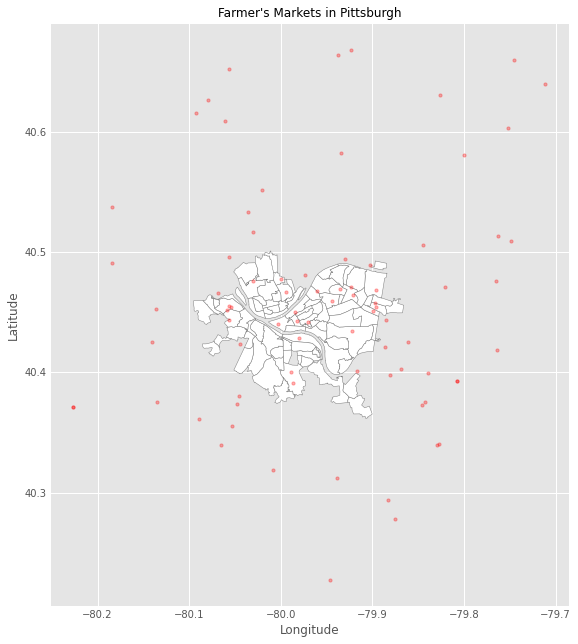

In [5]:
with plt.style.context(("fivethirtyeight", "ggplot")):
    neighborhoods.plot(figsize=(12,10), color="white", edgecolor = "grey");
plt.scatter(farm_market.longitude, farm_market.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Yikes! There's a ton of points outside of our shapefile that we need to eliminate. To cut out most of these, I'm first going to make a query mask based on the coordinates from our shapefile so we can get rid of most of our irrelavent points. 

In [6]:
query_mask = ((farm_market['latitude'] < 40.50) & (farm_market["latitude"] > 40.36) & (farm_market["longitude"] > -80.10) & (farm_market["longitude"] < -79.90))
city_markets = farm_market[query_mask]
city_markets.head()

,market_id,market_type,market_name,address1,city,state,zip_code,latitude,longitude,phone,phone_ext,county
1,51,Farm Market,Carrick Citiparks Farmers Market,1529 Brownsville Road,Pittsburgh,PA,15210,40.391341,-79.986603,4.124227e+09,NaN,Allegheny
2,90,Farm Market,East Liberty Farmers Market,N Euclid Ave & Broad St,Pittsburgh,PA,15026,40.470769,-79.922862,NaN,NaN,Allegheny
9,3688,Farm Stand,Green Grocer/UPMC Matilda Theiss Health Center,373 Burrows St,Pittsburgh,PA,15213,40.442058,-79.970400,NaN,NaN,Allegheny
12,3782,Farm Stand,Green Grocer /Northview Heights,533 Mt Pleasant Rd,Pittsburgh,PA,15214,40.477670,-79.999793,NaN,NaN,Allegheny
16,3683,Farm Stand,Green Grocer/Sharpsburg Community Library,1212 Main Street,Pittsburgh,PA,15215,40.494332,-79.930202,NaN,NaN,Allegheny


Cool, that narrows it down for sure. If we plot this data and then overlay it on our Pittsburgh shapefile again, I think that'll help us see how many points are still slightly outside the Pittsburgh neighborhoods.

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

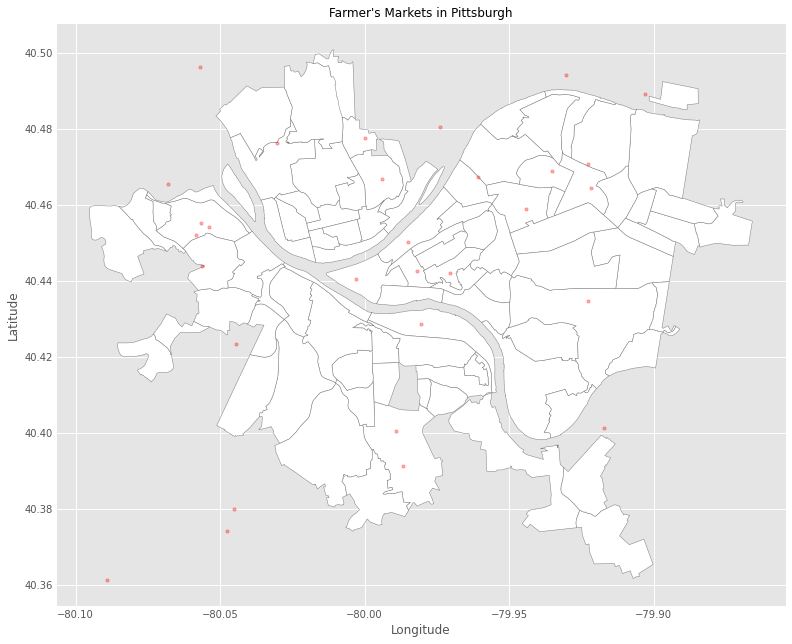

In [10]:
with plt.style.context(("fivethirtyeight", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(city_markets.longitude, city_markets.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Clearly improvement. It looks like we have 10 points that still don't lie within the shapefile, so I'm going to grab the coordinates from the city_markets dataframe and use this website: https://www.gps-coordinates.net/ to check which points are outside this shapefile, as well as get the neighborhoods for our valid points. Then, I'll make a new dataframe of the points that we need and the neighborhood they are in so we can merge it with our original dataframe.

In [11]:
map_markets = pd.DataFrame({"market_name": ["Carrick Citiparks Farmers Market","East Liberty Farmers Market","Green Grocer/UPMC Matilda Theiss Health Center","Green Grocer /Northview Heights", "Green Grocer/Old Shop n' Save Building", "Green Grocer/Pavillion", "Garfield Farm Stand", "Lawrenceville Farmers Market", "Pittsbugh Urban Graden project", "Green Grocer/Sheraden", "Green Grocer","Green Grocer/Three Rivers Manor", "Green Grocer/Sheraden Library", "Green Grocer/Woods Run Library", "Squirrel Hill FM", "Bloomfield Farmers Market", "Farmers Market Cooperative of East Liberty", "Pittsburgh Market Square", "Southside Farmers Market", "Sturges Orchards"] , "neighborhood": ["Carrick","East Liberty","Terrace Village","Northview Heights", "Crawford-Roberts", "Sheraden", "Garfield", "Lower Lawrenceville", "Crafton", "Sheraden", "Carrick", "Spring Hill-City View", "Sheraden", "Marshall-Shadeland", "Squirrel Hill South", "Bloomfield", "East Liberty", "Central Business District", "Southside Flats", "Strip District"]})
map_markets

,market_name,neighborhood
0,Carrick Citiparks Farmers Market,Carrick
1,East Liberty Farmers Market,East Liberty
2,Green Grocer/UPMC Matilda Theiss Health Center,Terrace Village
3,Green Grocer /Northview Heights,Northview Heights
4,Green Grocer/Old Shop n' Save Building,Crawford-Roberts
5,Green Grocer/Pavillion,Sheraden
6,Garfield Farm Stand,Garfield
7,Lawrenceville Farmers Market,Lower Lawrenceville
8,Pittsbugh Urban Graden project,Crafton
9,Green Grocer/Sheraden,Sheraden


Neighborhoods located! Time to merge!

In [12]:
merge_with_og = pd.merge(map_markets,farm_market)
merge_with_og.head()

,market_name,neighborhood,market_id,market_type,address1,city,state,zip_code,latitude,longitude,phone,phone_ext,county
0,Carrick Citiparks Farmers Market,Carrick,51,Farm Market,1529 Brownsville Road,Pittsburgh,PA,15210,40.391341,-79.986603,4.124227e+09,NaN,Allegheny
1,East Liberty Farmers Market,East Liberty,90,Farm Market,N Euclid Ave & Broad St,Pittsburgh,PA,15026,40.470769,-79.922862,NaN,NaN,Allegheny
2,Green Grocer/UPMC Matilda Theiss Health Center,Terrace Village,3688,Farm Stand,373 Burrows St,Pittsburgh,PA,15213,40.442058,-79.970400,NaN,NaN,Allegheny
3,Green Grocer /Northview Heights,Northview Heights,3782,Farm Stand,533 Mt Pleasant Rd,Pittsburgh,PA,15214,40.477670,-79.999793,NaN,NaN,Allegheny
4,Green Grocer/Old Shop n' Save Building,Crawford-Roberts,3684,Farm Stand,1850 Centre Ave,Pittsburgh,PA,15219,40.442741,-79.981917,NaN,NaN,Allegheny


Awesome, now we can plot these points *one more time* and they should all lie within our Pittsburgh neighborhood shapefile.

Text(0.5, 1.0, "Farmer's Markets in Pittsburgh")

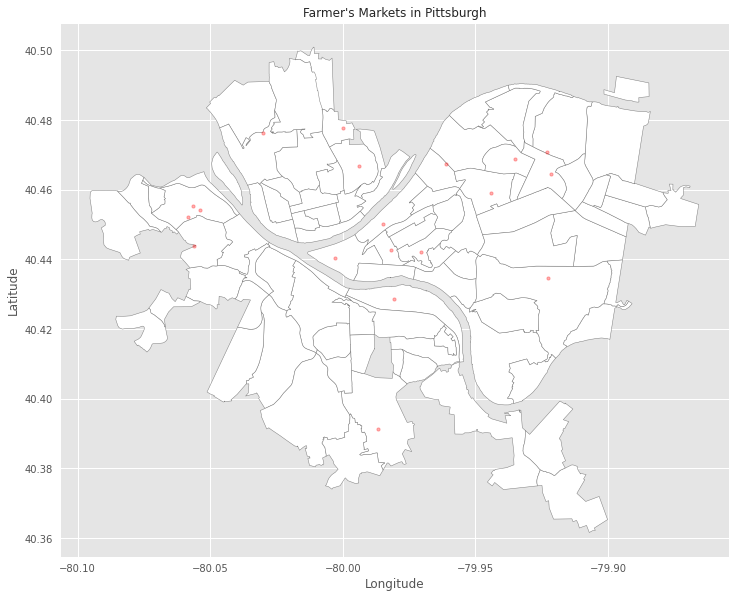

In [13]:
with plt.style.context(("seaborn", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(merge_with_og.longitude, merge_with_og.latitude, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Farmer\'s Markets in Pittsburgh")

Looks good! Let's see which neighborhoods have the most farmer's markets now.

In [14]:
market_count = map_markets.groupby("neighborhood").count()
market_count.sort_values("market_name", ascending = False) 

,market_name
neighborhood,
Sheraden,3
Carrick,2
East Liberty,2
Bloomfield,1
Central Business District,1
Crafton,1
Crawford-Roberts,1
Garfield,1
Lower Lawrenceville,1


We have Sheraden on top with 3 farmer's market locations, Carrick and East Liberty tied for second with 2 farmer's markets each, and a massive tie for third place with the rest of our remaining neighborhoods. Let's put this information in a bar chart, for a little data visualization action.

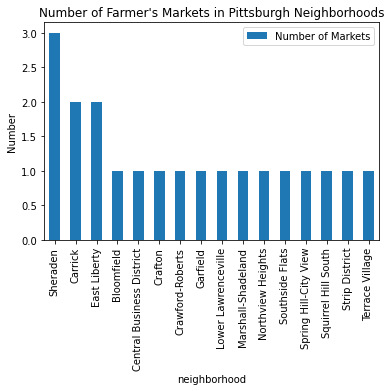

In [15]:
market_count.sort_values("market_name", ascending = False).plot.bar()
plt.title("Number of Farmer\'s Markets in Pittsburgh Neighborhoods")
plt.ylabel("Number")
plt.legend(["Number of Markets"])

Nice. Looks like Pittsburgh has a pretty decent selection of neighborhoods with farmer's markets, but if you're trying to *really* bulk up on organic produce every Saturday morning, Sheraden is the place to be.

Next, let's observe the health of Pittsburgh neighborhoods by calculating the overall fitness level of each Pittsburgh neighborhood by analyzing the steps and parks in Pittsburgh. 

In [16]:
#Importing the pandas package
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
# load in the community center data file
data = pd.read_csv("StepsData.csv", index_col="id")

# look at the first ten rows of the data
data.head(10)

,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,transit_rider_count,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
326501686,10 Wakefield St,3rd Division,NaN,Concrete,53.0,8.0,0.0,100.0,367.0,0.0,...,South Oakland,3.0,4.0,42003040900,3.0,4.0,4.0,2-11,40.430934,-79.957093
527853474,1005 St Martin St,4th Division,NaN,Concrete,33.0,24.0,NaN,NaN,NaN,NaN,...,South Side Slopes,3.0,17.0,42003170600,3.0,17.0,3.0,4-6,40.422418,-79.988218
1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,4.0,NaN,NaN,NaN,NaN,...,South Side Slopes,3.0,17.0,42003170600,3.0,17.0,3.0,4-6,40.422479,-79.987608
50987987,30th St from Bigelow Blvd to Leander St,3rd Division,1948-01-01,Concrete,106.0,106.0,0.0,100.0,235.0,27.0,...,Bedford Dwellings,7.0,6.0,42003060500,3.0,6.0,2.0,2-24,40.454801,-79.968473
173445306,30th St from Paulowna to Bigelow Blvd,3rd Division,1948-01-01,Concrete,204.0,85.0,1.0,4.0,422.0,39.0,...,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6,40.455481,-79.968756
1770071723,53rd St from Holmes St to Lotus Way West,2nd Division,1949-01-01,Concrete,105.0,44.0,1.0,8.0,1751.0,124.0,...,Upper Lawrenceville,7.0,10.0,42003101100,2.0,10.0,2.0,3-5,40.480350,-79.950137
1298252202,53rd St from Lotus Way to Duncan St,2nd Division,1949-01-01,Concrete,106.0,17.0,NaN,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10.0,42003101100,2.0,10.0,2.0,3-5,40.480112,-79.949808
1726357152,54th St from Wickliff to Camelia St,2nd Division,NaN,Concrete,424.0,188.0,1.0,10.0,1227.0,31.0,...,Upper Lawrenceville,7.0,10.0,42003101800,2.0,10.0,2.0,3-5,40.479923,-79.947304
652746099,56th St from Carnegie St to Duncan St,2nd Division,1946-01-01,Concrete,468.0,249.0,0.0,100.0,507.0,178.0,...,Upper Lawrenceville,7.0,10.0,42003101100,2.0,10.0,2.0,3-5,40.483363,-79.946767


In [18]:
df = pd.DataFrame(data) 

#Grouping the data by neighborhood
grouped = df.groupby('neighborhood') 

#Taking the sum of the values of number of steps for each unique neighborhood
numSteps = grouped['number_of_steps'].agg(np.sum) 

#Creating a data frame which displays the numSteps for each unique neighborhood
numSteps = pd.DataFrame(numSteps) 
numSteps

,number_of_steps
neighborhood,
Allegheny Center,38.0
Allegheny West,23.0
Allentown,417.0
Arlington,440.0
Banksville,338.0
...,...
Upper Lawrenceville,783.0
West End,127.0
West Oakland,376.0


In [19]:
#Idetifying the 10 neighborhoods with the most number of steps
highestSteps_neighborhoods = numSteps['number_of_steps'].nlargest(10) 
highestSteps_neighborhoods

neighborhood
South Side Slopes     4081.0
Beechview             2473.0
Perry South           1698.0
Greenfield            1472.0
Hazelwood             1374.0
Marshall-Shadeland    1349.0
Mount Washington      1321.0
Brookline             1246.0
Fineview              1174.0
Troy Hill             1115.0
Name: number_of_steps, dtype: float64

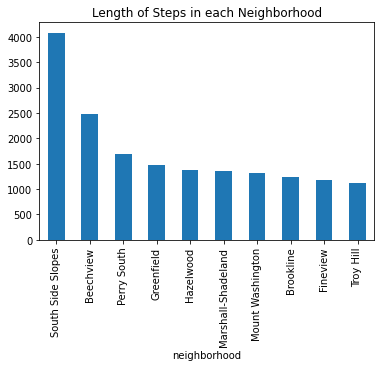

In [20]:
#Bar graph of the 10 neighborhoods with the highest number of steps with the number of steps along the y-axis
highestSteps_neighborhoods.plot.bar(title="Length of Steps in each Neighborhood")

In [49]:
#Finding the average steps length for each neighborhood and displaying it in a data frame
AvgLength = grouped['length'].agg(np.mean)
AvgLength = pd.DataFrame(AvgLength) 
AvgLength.fillna(0)

,length
neighborhood,
Allegheny Center,0.000000
Allegheny West,0.000000
Allentown,104.692308
Arlington,122.400000
Banksville,221.285714
...,...
Upper Lawrenceville,214.363636
West End,120.200000
West Oakland,46.833333


In [22]:
highestAvg_length = AvgLength['length'].nlargest(10) 
highestAvg_length 

neighborhood
Bon Air                  357.000000
East Allegheny           292.500000
Bluff                    288.000000
St. Clair                287.500000
Chartiers City           279.000000
Central Northside        268.000000
East Hills               262.500000
Crafton Heights          260.444444
Hazelwood                257.523810
Central Lawrenceville    254.000000
Name: length, dtype: float64

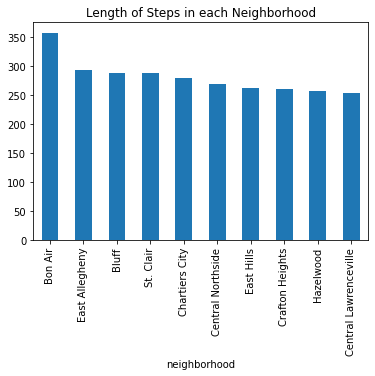

In [23]:
highestAvg_length.plot.bar(title="Length of Steps in each Neighborhood")

In [24]:
# load in the Parks data file
parks = pd.read_csv("PittsburghParks.csv", index_col="id")
# look at the first ten rows of the data
parks.head(10)

,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,
2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846


In [25]:
dfParks = pd.DataFrame(parks)
grouped2 = dfParks.groupby('neighborhood') 

#Calculating the number of parks in each unique neighborhood by using the "name" variable
numParks = grouped2['name'].count()
numParks = pd.DataFrame(numParks) 
numParks

,name
neighborhood,
Allegheny Center,2
Allentown,2
Arlington,1
Banksville,2
Bedford Dwellings,1
...,...
Upper Lawrenceville,3
West End,2
West Oakland,1


In [26]:
highestParks_neighborhoods = numParks['name'].nlargest(10) 
highestParks_neighborhoods

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
Point Breeze                  7
South Side Slopes             7
Hazelwood                     6
Mount Washington              6
Sheraden                      6
South Side Flats              6
Squirrel Hill South           6
Name: name, dtype: int64

[Text(0, 0.5, '')]

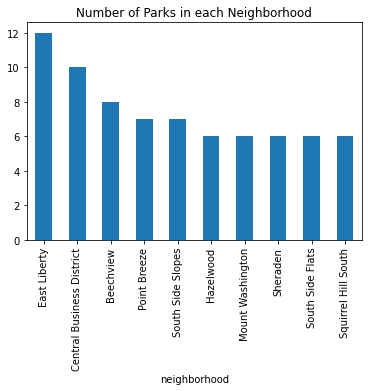

In [27]:
highestParks_neighborhoods.plot.bar(title='Number of Parks in each Neighborhood').set(ylabel=None)

[Text(0, 0.5, '')]

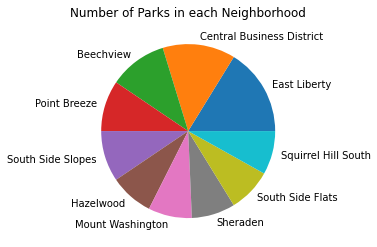

In [28]:
highestParks_neighborhoods.plot.pie(title='Number of Parks in each Neighborhood').set(ylabel=None)


In [29]:
#Merging the two data frames numSteps and numParks, based on the neighborhood variable from numParks and the neighborhood variable from numSteps
all_fitness = numParks.merge(numSteps,left_on='neighborhood',right_on='neighborhood') 

#Merging the previously merged dataframe to the dataframe AvgLength based on the neighborhood variable from both dataframes
all_fitness = all_fitness.merge(AvgLength,left_on='neighborhood',right_on='neighborhood') 
all_fitness

,name,number_of_steps,length
neighborhood,,,
Allegheny Center,2,38.0,NaN
Allentown,2,417.0,104.692308
Arlington,1,440.0,122.400000
Banksville,2,338.0,221.285714
Bedford Dwellings,1,234.0,162.666667
...,...,...,...
Upper Lawrenceville,3,783.0,214.363636
West End,2,127.0,120.200000
West Oakland,1,376.0,46.833333


In [38]:
#total_fitness = pd.Series()   
#data = pd.DataFrame(data)
#for index, row in all_fitness.iterrows(): 
    #Num_steps = row['number_of_steps'] 
    #Length = row['length']   
    #Num_parks = row['name']
    #total_fitness[index] = Num_steps * Length * Num_parks
    
#total_fitness  
#total_fitness = pd.DataFrame(total_fitness,columns=['Overall Fitness Level']) 
#total_fitness
all_fitness["Overall Fitness Level"] = all_fitness["name"] * all_fitness["number_of_steps"] * all_fitness["length"]
all_fitness.fillna(0)

,name,number_of_steps,length,Overall Fitness Level
neighborhood,,,,
Allegheny Center,2,38.0,0.000000,0.000000
Allentown,2,417.0,104.692308,87313.384615
Arlington,1,440.0,122.400000,53856.000000
Banksville,2,338.0,221.285714,149589.142857
Bedford Dwellings,1,234.0,162.666667,38064.000000
...,...,...,...,...
Upper Lawrenceville,3,783.0,214.363636,503540.181818
West End,2,127.0,120.200000,30530.800000
West Oakland,1,376.0,46.833333,17609.333333


In [39]:
most_fit_neighborhoods = total_fitness['Overall Fitness Level'].nlargest(10)  
most_fit_neighborhoods 

Beechview             4.863896e+06
South Side Slopes     4.860854e+06
Hazelwood             2.123026e+06
Troy Hill             1.142017e+06
Mount Washington      1.037425e+06
Sheraden              9.571085e+05
Marshall-Shadeland    9.357708e+05
Perry South           7.979505e+05
Brookline             6.200808e+05
Elliott               6.049917e+05
Name: Overall Fitness Level, dtype: float64

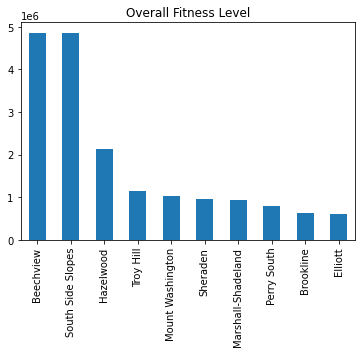

In [40]:
most_fit_neighborhoods.plot.bar(title='Overall Fitness Level')  

[Text(0, 0.5, '')]

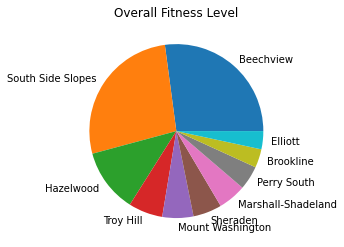

In [41]:
myPlot = most_fit_neighborhoods.plot(kind='pie',title='Overall Fitness Level')  
myPlot.set(ylabel = None)

# Combined Metric Analysis to determine Best Neighborhood

Now that we've got all our metrics analyzed and we have a frontrunning neighborhood for each category, let's see if combining our data changes any of the rankings. The chart below combines the neighborhoods by the number of parks, number of steps, length of the steps, and the number of farmer's markets in each neighborhood.

In [45]:
#Combining Overall Fitness Level with Nutrition Level  

#Merging the two data frames all_fitness and market_count 
Merged = all_fitness.merge(market_count,left_on='neighborhood',right_on='neighborhood') 
Merged.fillna(0)

,name,number_of_steps,length,Overall Fitness Level,market_name
neighborhood,,,,,
Bloomfield,3,161.0,107.000000,51681.000000,1
Carrick,3,794.0,168.645161,401712.774194,2
Central Business District,10,0.0,0.000000,0.000000,1
Crawford-Roberts,3,197.0,143.250000,84660.750000,1
East Liberty,12,0.0,0.000000,0.000000,2
Garfield,3,693.0,139.133333,289258.200000,1
Lower Lawrenceville,3,23.0,23.500000,1621.500000,1
Marshall-Shadeland,4,1349.0,173.419355,935770.838710,1
Sheraden,6,887.0,179.840000,957108.480000,3


Now that our data is merged, let's multiply across the columns to get an overall health index for each neighborhood.

In [46]:
Merged['Overall Health'] =  Merged['name'] * Merged['number_of_steps']  * Merged['length'] * Merged['market_name'] 
    
#total_health  
#total_health = pd.DataFrame(total_health,columns=['Overall Health Level']) 
Merged.fillna(0)

,name,number_of_steps,length,Overall Fitness Level,market_name,Overall Health
neighborhood,,,,,,
Bloomfield,3,161.0,107.000000,51681.000000,1,5.168100e+04
Carrick,3,794.0,168.645161,401712.774194,2,8.034255e+05
Central Business District,10,0.0,0.000000,0.000000,1,0.000000e+00
Crawford-Roberts,3,197.0,143.250000,84660.750000,1,8.466075e+04
East Liberty,12,0.0,0.000000,0.000000,2,0.000000e+00
Garfield,3,693.0,139.133333,289258.200000,1,2.892582e+05
Lower Lawrenceville,3,23.0,23.500000,1621.500000,1,1.621500e+03
Marshall-Shadeland,4,1349.0,173.419355,935770.838710,1,9.357708e+05
Sheraden,6,887.0,179.840000,957108.480000,3,2.871325e+06


Nice! Now all the neighborhoods have an overall health index based on our own individual metric analysis. Lets get a view of the top ten neighborhoods with the largest index.

In [47]:
most_healthy_neighborhoods = Merged['Overall Health'].nlargest(10)  
most_healthy_neighborhoods 

neighborhood
Sheraden                 2.871325e+06
Marshall-Shadeland       9.357708e+05
Carrick                  8.034255e+05
Spring Hill-City View    4.129732e+05
Garfield                 2.892582e+05
Squirrel Hill South      1.298108e+05
Crawford-Roberts         8.466075e+04
Bloomfield               5.168100e+04
Terrace Village          3.074000e+04
Strip District           2.002000e+04
Name: Overall Health, dtype: float64

We can put these sorted indexes into a bar graph and...

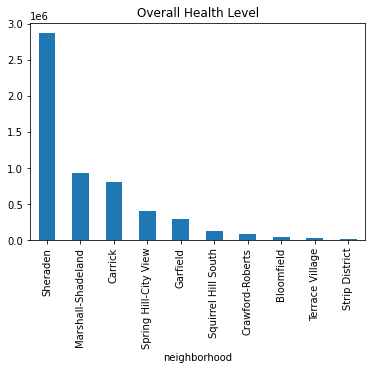

In [48]:
most_healthy_neighborhoods.plot.bar(title='Overall Health Level')  

Voila! From this graph, we can easily see that Sheraden is the healthiest neighborhood based on our metrics, making it the best neighborhood in Pittsburgh.

# In conclusion...

Lauren: I grew up just outside of Pittsburgh, so I’ve gotten to experience many neighborhoods in the city. However, I don't think I've ever been to Sheraden, but now I'm interested in going since it seems like it has a nice park and some cool farmer's markets to check out. Personally, Shadyside is my favorite neighborhood because it has so many places to shop and eat, and it hosts a lot of fun events like Jam on Walnut and the arts fest. It’s also just a great place to walk around and explore.

Paul:

Shreya's Conclusion: Personally, I am not from Pittsburgh so I have not visited most of these neighborhoods. However, it was very interesting to see that Sheraden is the healthiest neighborhood by more than double than the second best neighborhood. Upon doing further research, I found that Sheraden is known as one of Pittsburgh's most beautiful and natural neighborhoods as well as isknown for its parks and other recreational facilities. Furthermore, this may contribute to the fact that Sheraden is observed to be the healthiest neighborhood in terms of our two submetrics. If I were to live in Pittsburgh, Sheraden would be the neighborhood of my choice. 